   <img src="cat vs dog.jpg" width=700 height=620 />

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img

In [ ]:
import os

In [ ]:
sample = pd.read_csv("/home/google/Documents/Deep Learning Implemantation/CNN/datasets/dogs-vs-cats/sampleSubmission.csv")

In [ ]:
sample.head(10)

## Define constants

In [ ]:
FAST_RUN = False
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

**Preparing the training  data**

In [ ]:
# Read the data

filenames = os.listdir("/home/google/Documents/Deep Learning Implemantation/CNN/datasets/dogs-vs-cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]  # Here we just grab the label cat or dog from our file name. Exa: cat.0.jpg
    if category == "dog":
        categories.append(1)
    else:
        categories.append(0)
# then lets create a dataframe from it
df = pd.DataFrame({
                    'filiname':filenames,
                    'categoty':categories
                 })

In [ ]:
df.head()

**0:cat and 1:dog**

## EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.countplot(x=categories,data=df)

It seems that we have same number of dogs and cats images.

In [ ]:
#  Lets see one image from our data set
sample = np.random.choice(filenames)
img = load_img('/home/google/Documents/Deep Learning Implemantation/CNN/datasets/dogs-vs-cats/train/'+sample)
plt.imshow(img)

## New cat VS Dog

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,BatchNormalization,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix,classification_report
import os
import random
import glob

import shutil

Here we gonna use train data only and we will split it into train,test and valid data set.

In [ ]:
#  Run below 4 cell one time only.

In [ ]:
#os.chdir('train')
if os.path.isdir('train/dogs') is False:  # Means if there are no 'dogs' directory in train folder then we will craete our dir.
    os.makedirs('train/dogs')
    os.makedirs('train/cats')
    os.makedirs('valid/dogs')
    os.makedirs('valid/cats')
    os.makedirs('test/dogs')
    os.makedirs('test/cats')

Now let's organize our data in train,test and valid directory.<br>
We will use numpy sampling for that.

In [ ]:
for i in random.sample(glob.glob('cat*'),500):
    shutil.move(i, 'train/cats')


In [ ]:
for i in random.sample(glob.glob('dog*'),500):  # here we are just moving 500 dog images to our dogs folder in train folder
    shutil.move(i, 'train/dogs')
for i in random.sample(glob.glob('cat*'), 100):
    shutil.move(i, 'valid/cats')
for i in random.sample(glob.glob('dog*'), 100):
    shutil.move(i, 'valid/dogs')
for i in random.sample(glob.glob('cat*'), 50):
    shutil.move(i, 'test/cats')
for i in random.sample(glob.glob('dog*'), 50):
    shutil.move(i,'test/dogs')

In [ ]:
os.chdir('../../')

We then create variables for which the the paths to the train, valid, and test data directories are assigned.

In [ ]:
os.getcwd()

In [2]:
train_path = '/home/google/Downloads/dog-vs-cat/train'
valid_path = '/home/google/Downloads/dog-vs-cat/test'
test_path = '/home/google/Downloads/dog-vs-cat/valid'

In [ ]:
os.listdir(train_path)

 Now, we use Keras' ImageDataGenerator class to create batches of data from the train, valid, and test directories. Here we are converting our data into keras generator.



In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)


Found 1000 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


1. Here ImageDataGenerator will return a directory type iterator. 
2. Basically its going to create batches from the specifided direcctory, which will pass through our Sequential model.
3. **tf.keras.applications.vgg16.preprocess_input**: This preprocessing function will going to apply some preprocessing on our data which is similar to preprocessed images which get passed to popular vgg16 model.
4. **target_size**: Here we just resize all our images into 224*224 (height,width).
5. shuffle = False because we want to access our test set for confusion metrix and predictions for that reason test set should be false.

In [4]:
# Lets grab a single batch of images and label
imgs,labels = next(train_batches)

In [5]:
import  matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Lets plot all images in that batches:

def plot_images(img_arr):
    fig,axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(img_arr,axes):
        ax.imshow(img)
        
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

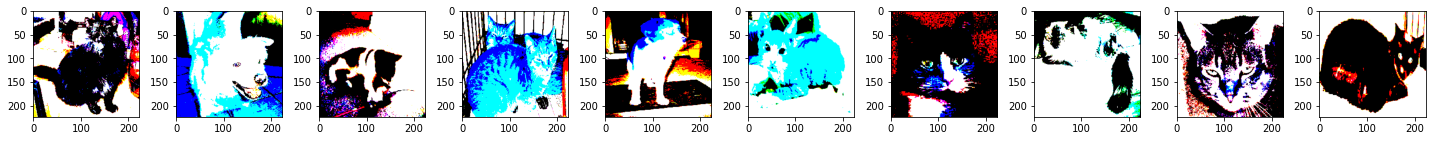

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
plot_images(imgs)
print(labels)

 Here 0ne_hot_vector for cat is [1,0] and for dog is [0,1] 

**Here you may get confuse, which class assign with which label. Means 0 for which class and 1 for which class(in case of binary classification) or which one_hot_vector belongs to which class. To find it keras ImageGenerator have argument which will tell us which lable belongs to which class.**

In [8]:
test_batches.class_indices

{'cats': 0, 'dogs': 1}

Here it returns a dict which contain classes as keys and indeces(in case when we have one_hot_vector) or lables as values.
as we can see in [1,0],1 has 0 as index value 0 and belongs to class cat.
similarly [0,1],1 has 1 as index value which represent dog class.  

# Building our Keras Model

In [ ]:
model = Sequential([
    Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', padding = 'same', input_shape = (224,224,3)),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu',padding = 'same'),
    MaxPool2D(pool_size = (2,2),strides = 2),
    Flatten(),
    Dense(2,activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= Adam(learning_rate= 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x = train_batches,validation_data=valid_batches,epochs= 10, verbose=2)

1. If we specify loss = binary_crossentropy instead of categorical_crossentropy then we will get only one o/p instead of 2 o/p and our output layer(here it is Dense Layer) activation will sigmoid  instead of softmax.
2. We are not specifying test data in fit fuction because when data stored at generator data itself contains its labels. so we don't need to specify explicitly.

**Here as we can see our test accuracy is 100% but validation accuracy is only 64% which is clear sign of over fitting problem and we need to fix this.**

# Let's make prediction for now

In [ ]:
# Get a batch of test data
test_imgs,test_labels = next(test_batches)
print(test_labels)
plot_images(test_imgs)

In [ ]:
test_batches.classes

 As we can see these are unshuffled labels thats what we needed.

In [ ]:
prediction = model.predict(x = test_batches, verbose=0)

In [ ]:
np.round(prediction)

In [ ]:
print(confusion_matrix(y_true= test_batches.classes, y_pred= np.argmax(prediction,axis=-1)))

In [ ]:
print(classification_report(y_true=test_batches.classes,y_pred= np.argmax(prediction,axis=-1)))

Here the accuracy is not good but we can improve it with transfer learning.

# Saving and loading the model 

**Saving the entire model.**

In [ ]:
model.save('model.h5')

In [ ]:
os.getcwd()

**Loading the entire model**

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')

In [ ]:
new_model.summary()

**Saving only the model weights**

In [ ]:
model.save_weights('model_weights.h5')

At a later point, we could then load the saved weights into a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.

In [ ]:
#Example: 
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])  # Same architecture as previous one

model2.load_weights('model_weights.h5')

**Saving only architecture of our model**

This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model. 

In [ ]:
# Storing in json format
json_string = model.to_json()

In [ ]:
#Storing in yaml format
yaml_string = model.to_yaml()

In [ ]:
#Example:
from tensorflow.keras.models import model_from_json,model_from_yaml
model_arch_json =  model_from_json(json_string)
model_arch_yaml = model_from_yaml(yaml_string)

In [ ]:
model_arch_json.summary()

In [ ]:
model_arch_yaml.summary()

# Practice Ends here. Let's back to our  work.

# Now Let's use vgg16 pretrained model from our catVSdog prediction

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

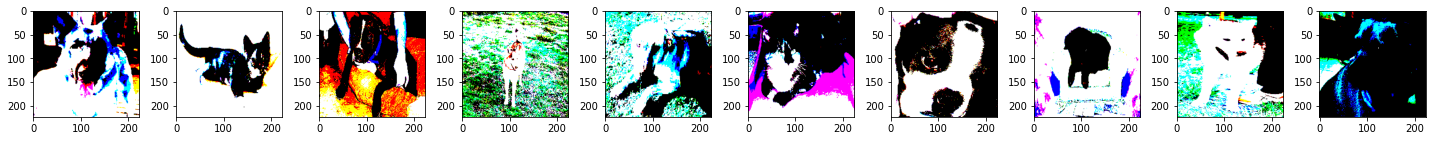

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [34]:
imgs, labels = next(train_batches)
plot_images(imgs)
print(labels)

These color are because of preprocessing of vgg16 preprocess_input on our images. <br>
From vgg16 paper in the **Architecture** section, we can see that the authors stated that, **"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."** 

In [19]:
# Now let's download the vgg16 model.
vgg16_model = tf.keras.applications.vgg16.VGG16()

**What The!!!!!! 553.5MB need to download..That's not fair** Anyway you can find your downloaded model in .keras /models directory. Copy it to a safe loaction for later use.

In [20]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

 Let's save the model first to avoid any data loss. I mean for later use ................

In [22]:
vgg16_model.save('vgg16.h5')

In [23]:
vgg16_model.save_weights('vgg16_weights.h5')

* Here this model is specially used for muticlass classification which can classify upto 1000 different classes
  see here "predictions (Dense)          (None, 1000)              4097000 " in model summary section.
* So we need to twick the last layer in this model to o/p only 2 classes not 1000..................

In [24]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

As we can see this not a Sequential model, its a Keras functional API. Which is a more complex and more sophisticated functional API. So for now we are going to convert it into a simple Sequential model....So don't mad at me...

In [26]:
from tensorflow.keras.models import load_model
dog_cat_model = load_model('vgg16.h5')

In [27]:
dog_cat_model = Sequential()
for layer in vgg16_model.layers[:-1]:
    dog_cat_model.add(layer)

# Here we just take all layers from vgg16 but not the last dense layer because we gonna twick it for our use.

Here as its a pretrained model so we don't need to waste our time to train this monster again but as we gonna twick its last dense layer so we only need to train our last Dense/output layer.

In [36]:
for layer in dog_cat_model.layers:
    layer.trainable = False
# Now those parameters will not gonna train again

Let's twick or add our custom Dence layer or o/p layer in vgg16 model.

In [29]:
dog_cat_model.add(Dense(2,activation = 'softmax'))

Here we define units 2 as we want to predict 2 classes cat and dog.

In [37]:
dog_cat_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

As we can see now we have to train less no. of parameters.

In [38]:
dog_cat_model.compile(optimizer= Adam(learning_rate= 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
dog_cat_model.fit(x = train_batches,validation_data=valid_batches,epochs=5,verbose=2)

Epoch 1/5
100/100 - 326s - loss: 0.0141 - accuracy: 0.9920 - val_loss: 0.0757 - val_accuracy: 0.9900
Epoch 2/5
100/100 - 316s - loss: 0.0141 - accuracy: 0.9920 - val_loss: 0.0757 - val_accuracy: 0.9900
Epoch 3/5
100/100 - 308s - loss: 0.0141 - accuracy: 0.9920 - val_loss: 0.0757 - val_accuracy: 0.9900
Epoch 4/5
100/100 - 318s - loss: 0.0141 - accuracy: 0.9920 - val_loss: 0.0757 - val_accuracy: 0.9900
Epoch 5/5
100/100 - 314s - loss: 0.0141 - accuracy: 0.9920 - val_loss: 0.0757 - val_accuracy: 0.9900


As I am using a cpu for this it took me 25min to run only 5 epocs.

So now prediction time!!

In [40]:
prediction = dog_cat_model.predict(x = test_batches,verbose=0)

In [41]:
np.round(prediction)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [45]:
print(confusion_matrix(y_true= test_batches.classes, y_pred= np.argmax(prediction,axis=-1)))

[[48  2]
 [ 2 48]]


Only 2 classes wrongly predicted.

In [46]:
print(classification_report(y_true= test_batches.classes, y_pred= np.argmax(prediction, axis= -1)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        50
           1       0.96      0.96      0.96        50

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



# Great Job dude!!